# KNN vs Logistic Regression

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

# load the data from the file
data = load_data("interview.csv", None)
print("Load the data from the file")
print(data.head())

Load the data from the file
       0      1  2
0  34.62  78.02  0
1  30.29  43.89  0
2  35.85  72.90  0
3  60.18  86.31  1
4  79.03  75.34  1


In [3]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
print("X = Feature values, all the columns except the last column")
print(X.head())

# y = target values, last column of the data frame
y = data.iloc[:, -1]
print("y = target values, last column of the data frame")
print(y.head())



X = Feature values, all the columns except the last column
       0      1
0  34.62  78.02
1  30.29  43.89
2  35.85  72.90
3  60.18  86.31
4  79.03  75.34
y = target values, last column of the data frame
0    0
1    0
2    0
3    1
4    1
Name: 2, dtype: int64


In [4]:
# filter out the applicants that got selected
admitted = data.loc[y == 1]
print("applicants that got selected")
print(admitted.head())

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]
print("applicants that din't get selected")
print(not_admitted.head())

applicants that got selected
       0      1  2
3  60.18  86.31  1
4  79.03  75.34  1
6  61.11  96.51  1
7  75.02  46.55  1
8  76.10  87.42  1
applicants that din't get selected
        0      1  2
0   34.62  78.02  0
1   30.29  43.89  0
2   35.85  72.90  0
5   45.08  56.32  0
10  95.86  38.23  0


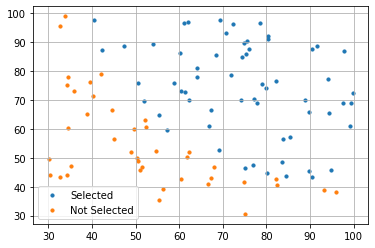

In [5]:
# plots the data points
plt.figure()
plt.scatter(admitted.iloc[:, 0], 
            admitted.iloc[:, 1], s=10, 
            label='Selected')
plt.scatter(not_admitted.iloc[:, 0], 
            not_admitted.iloc[:, 1], s=10, 
            label='Not Selected')
plt.grid()
plt.legend()
plt.show()

In [6]:
# we split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(80, 2)
(20, 2)
(80,)
(20,)


In [7]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix


In [8]:
# bulding the LogR model 
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train, Y_train)

print("Coefficients of the Logistic regression model")
coef = model_lr.coef_
intercept = model_lr.intercept_
print("Coef: ", coef)
print("Intercept: ", intercept)

Coefficients of the Logistic regression model
Coef:  [[0.21666139 0.20985692]]
Intercept:  [-25.97829721]


In [9]:
model_knn = KNeighborsClassifier(n_neighbors=9) #, p=2, metric='minkowski'
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [10]:
# predicting train set to calculate acuracy of LR model
predicted_classes_lr = model_lr.predict(X_train)

predicted_classes_knn = model_knn.predict(X_train)

Confusion Matrix for LR model::
[[26  4]
 [ 3 47]]


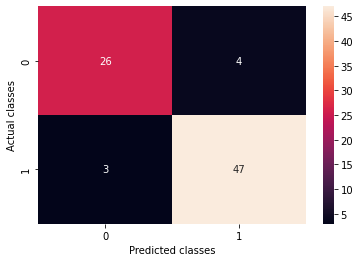

Confusion Matrix for Knn model::
[[27  3]
 [ 2 48]]


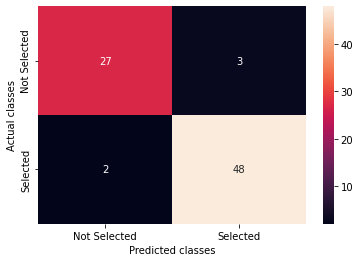

In [11]:
print("Confusion Matrix for LR model::")
conf_mat_lr = confusion_matrix(Y_train.tolist(),predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr,annot = True) #ann = {"ha": 'center',"va": 'center'}
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Confusion Matrix for Knn model::")
conf_mat_knn = confusion_matrix(Y_train.tolist(),predicted_classes_knn)
print(conf_mat_knn)
sns.heatmap(conf_mat_knn,annot = True, xticklabels = ["Not Selected", "Selected"], yticklabels = ["Not Selected", "Selected"])
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()


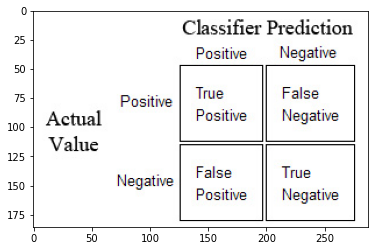

In [12]:
import matplotlib.image as mpimg
img=mpimg.imread('confusion-matrix.png')
imgplot = plt.imshow(img)
plt.show()

In [13]:
from matplotlib.colors import ListedColormap
def decision_boundary(X,y,model,title):
    # Create color maps
    cmap_light = ListedColormap(['cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])
    h = 0.1
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

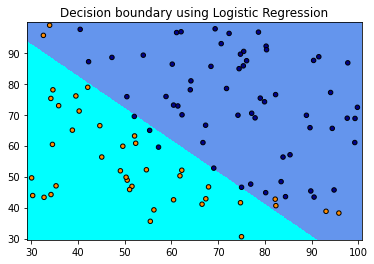

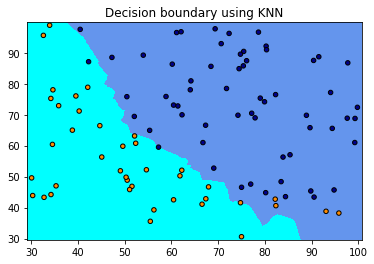

In [14]:
### Decision boundary of Logistic Reg classifier
decision_boundary(X,y,model_lr,"Decision boundary using Logistic Regression")  

### Decision boundary of KNN classifier
decision_boundary(X,y,model_knn, "Decision boundary using KNN")  

In [15]:
# claculate accuracy scores for train sets
accuracy_lr = accuracy_score(Y_train,predicted_classes_lr)
print("accuracy score (train) for LR model::", accuracy_lr)

accuracy_knn = accuracy_score(Y_train,predicted_classes_knn)
print("accuracy score (train) for Knn model::", accuracy_knn)

accuracy score (train) for LR model:: 0.9125
accuracy score (train) for Knn model:: 0.9375


In [17]:
### Test SET

predicted_test_classes_lr = model_lr.predict(X_test)
predicted_test_classes_knn = model_knn.predict(X_test)

print("Confusion Matrix (Test set) for LR model::")
conf_mat_test_lr = confusion_matrix(Y_test.tolist(),predicted_test_classes_lr)
print(conf_mat_test_lr)

print("Confusion Matrix (Test set) for Knn model::")
conf_mat_test_knn = confusion_matrix(Y_test.tolist(),predicted_test_classes_knn)
print(conf_mat_test_knn)

accuracy_test_lr = accuracy_score(Y_test,predicted_test_classes_lr)
print("accuracy score - Log Reg (Test set)::", accuracy_test_lr)

accuracy_test_knn = accuracy_score(Y_test,predicted_test_classes_knn)
print("accuracy score - Knn (Test set)::", accuracy_test_knn)

Confusion Matrix (Test set) for LR model::
[[ 8  2]
 [ 0 10]]
Confusion Matrix (Test set) for Knn model::
[[ 9  1]
 [ 0 10]]
accuracy score - Log Reg (Test set):: 0.9
accuracy score - Knn (Test set):: 0.95


In [18]:
### Save model
import joblib

joblib.dump(model_lr, 'model_lr.pkl')
lr = joblib.load('model_lr.pkl')
lr.predict(X_test)

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

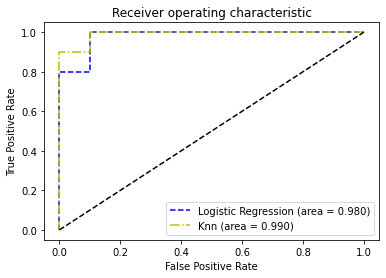

In [19]:
## ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()

logit_roc_auc = roc_auc_score(Y_test, model_lr.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1], drop_intermediate=False) #, drop_intermediate=False
plt.plot(fpr, tpr, 'b--', label='Logistic Regression (area = %0.3f)' % logit_roc_auc)


knn_roc_auc = roc_auc_score(Y_test, model_knn.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, model_knn.predict_proba(X_test)[:,1], drop_intermediate=False)
plt.plot(fpr_knn, tpr_knn, 'y-.', label='Knn (area = %0.3f)' % knn_roc_auc)

plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()